In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [2]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [3]:
x_train.shape

(60000, 28, 28)

Text(0.5, 1.0, '5')

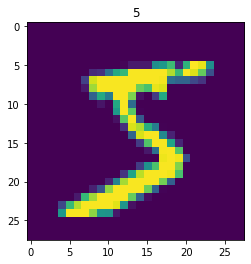

In [4]:
plt.imshow(x_train[0])
plt.title(y_train[0])

In [5]:
x_test.shape

(10000, 28, 28)

Text(0.5, 1.0, '7')

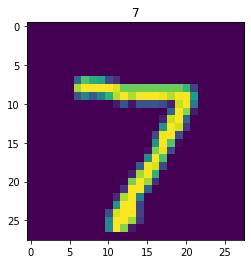

In [6]:
plt.imshow(x_test[0])
plt.title(y_test[0])

In [7]:
# 相关数据归一化
x_train, x_test = (x_train)/255.0, (x_test)/255.0


In [8]:
# 创建模型，前向传播
model = tf.keras.models.Sequential([
    #第一层拉直层
    tf.keras.layers.Flatten(),
    #第二层和第三层全连接层
    tf.keras.layers.Dense(
        128, activation="relu"),
    tf.keras.layers.Dense(
        10, activation="softmax")
])


In [9]:
model.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"]
              )
#metrics=["sparse_categorical_accuracy"]

In [10]:
train_result=model.fit(x_train,y_train,batch_size=16,epochs=5,validation_data=(x_test,y_test),validation_freq=1)
#train_result=model.fit(x_train,y_train,batch_size=100,epochs=10,validation_freq=1)

Epoch 1/5
3750/3750 [==============================] - 2s 488us/step - loss: 0.4995 - accuracy: 0.8678 - val_loss: 0.2921 - val_accuracy: 0.9167
Epoch 2/5
3750/3750 [==============================] - 2s 451us/step - loss: 0.2788 - accuracy: 0.9210 - val_loss: 0.2417 - val_accuracy: 0.9310
Epoch 3/5
3750/3750 [==============================] - 2s 456us/step - loss: 0.2323 - accuracy: 0.9347 - val_loss: 0.2080 - val_accuracy: 0.9405
Epoch 4/5
3750/3750 [==============================] - 2s 459us/step - loss: 0.2014 - accuracy: 0.9435 - val_loss: 0.1854 - val_accuracy: 0.9479
Epoch 5/5
3750/3750 [==============================] - 2s 457us/step - loss: 0.1779 - accuracy: 0.9499 - val_loss: 0.1652 - val_accuracy: 0.9531


In [11]:
model.save(".//models//shouxie.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (16, 784)                 0         
_________________________________________________________________
dense (Dense)                (16, 128)                 100480    
_________________________________________________________________
dense_1 (Dense)              (16, 10)                  1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
#设置黑体为默认字体
plt.rcParams["font.sans-serif"] = "SimHei"
#设置正常显示负号
plt.rcParams["axes.unicode_minus"] = False

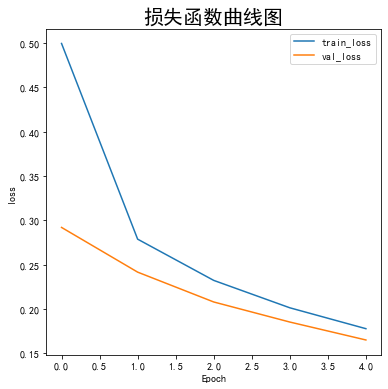

In [13]:
#训练和测试时的损失函数
train_loss=train_result.history["loss"]
val_loss=train_result.history["val_loss"]
plt.figure(figsize=(6,6))
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.plot(train_loss,label="train_loss")
plt.plot(val_loss,label="val_loss")
plt.title("损失函数曲线图",fontsize=20)
plt.legend()
plt.show()

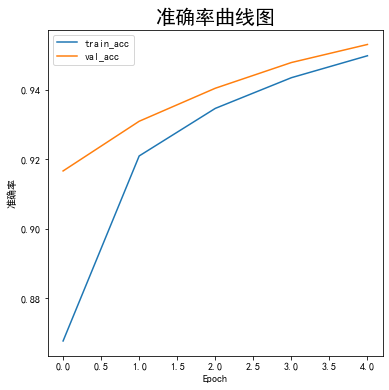

In [14]:
#训练和测试时的准确率
train_acc=train_result.history["accuracy"]
val_acc=train_result.history["val_accuracy"]
plt.figure(figsize=(6,6))
plt.xlabel("Epoch")
plt.ylabel("准确率")
plt.plot(train_acc,label="train_acc")
plt.plot(val_acc,label="val_acc")
plt.title("准确率曲线图",fontsize=20)
plt.legend()
plt.show()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



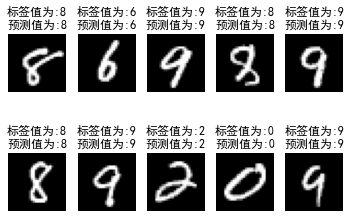

In [15]:
for i in range(10):
    num=np.random.randint(x_test.shape[0])
    plt.subplot(2,5,i+1)
    plt.axis("off")
    plt.imshow(x_test[num],cmap="gray")
    demo=tf.reshape(x_test[num],(1,28,28))
    #取预测概率最大的
    pred_result=np.argmax(model.predict(demo))
    plt.title("标签值为:"+str(y_test[num])+"\n预测值为:"+str(pred_result))


